In [1]:
pip install pandas

In [2]:
import pandas as pd


In [3]:
pip install pandas-datareader

In [4]:
import pandas_datareader.data as csv

In [5]:
desktop_path = "/content/drive/MyDrive/311data.csv"

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815538 entries, 0 to 815537
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                815538 non-null  int64         
 1   location_type     630641 non-null  object        
 2   incident_address  682999 non-null  object        
 3   city              815506 non-null  object        
 4   borough           815538 non-null  object        
 5   latitude          815538 non-null  float64       
 6   longitude         815538 non-null  float64       
 7   created_date      815538 non-null  datetime64[ns]
 8   closed_date       792891 non-null  datetime64[ns]
 9   agency            815538 non-null  object        
 10  agency_name       815538 non-null  object        
 11  complaint_type    815538 non-null  object        
 12  description       812917 non-null  object        
 13  resolution_date   804159 non-null  datetime64[ns]
dtypes: d

In [8]:
data.isnull().sum()


,0
id,0
location_type,184897
incident_address,132539
city,32
borough,0
latitude,0
longitude,0
created_date,0
closed_date,22647
agency,0


In [11]:
data = data.dropna(subset=['borough', 'complaint_type'])
data['created_date'] = pd.to_datetime(data['created_date'])
data['closed_date'] = pd.to_datetime(data['closed_date'])
data['resolution_date'] = pd.to_datetime(data['resolution_date'])


In [12]:
data['complaint_type'].value_counts().head(10)


,count
complaint_type,
HEATING,89980
Noise - Residential,66394
GENERAL CONSTRUCTION,55883
PLUMBING,43302
Damaged Tree,43288
PAINT - PLASTER,37721
NONCONST,31779
Street Condition,29077
Water System,28758


In [13]:
data['borough'].value_counts()


,count
borough,
BROOKLYN,261597
QUEENS,201051
MANHATTAN,156794
BRONX,154389
STATEN ISLAND,41651
Unspecified,56


In [15]:
data['response_time'] = (data['closed_date'] - data['created_date']).dt.total_seconds() / (60*60*24)
avg_response = data.groupby('agency')['response_time'].mean().sort_values()
avg_response


,response_time
agency,
DOHMH,-1111.113796
NYPD,-0.273740
36951,0.000585
HRA,1.227778
FDNY,2.182066
DEP,5.857473
EDC,8.977724
DCA,9.504226
HPD,11.271642


<Axes: title={'center': 'Total Complaints Per Day'}, xlabel='date_only'>

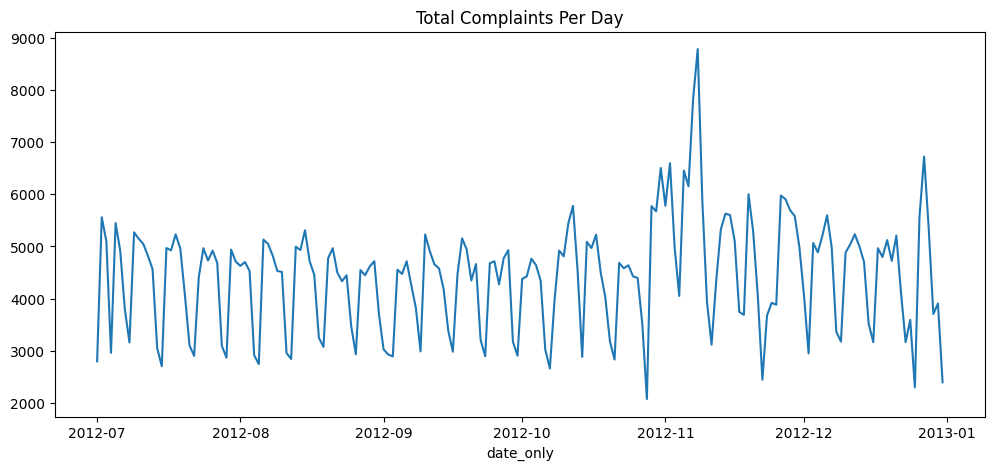

In [16]:
data['date_only'] = data['created_date'].dt.date
daily_counts = data.groupby('date_only').size()
daily_counts.plot(figsize=(12,5), title='Total Complaints Per Day')


In [17]:
data['agency'].value_counts()


,count
agency,
HPD,281267
NYPD,151908
DOT,93924
DEP,73367
DPR,66531
DSNY,55112
DOB,42045
DOHMH,24142
TLC,10898


In [18]:
rodents = data[data['complaint_type'] == 'Rodent']
rodents['borough'].value_counts()


,count
borough,
BROOKLYN,3729
MANHATTAN,2551
BRONX,2013
QUEENS,1993
STATEN ISLAND,639


In [19]:
pd.crosstab(data['borough'], data['complaint_type'])


complaint_type,APPLIANCE,Adopt-A-Basket,Air Quality,Animal Facility - No Permit,Animal in a Park,Asbestos,BEST/Site Safety,Beach/Pool/Sauna Complaint,Benefit Card Replacement,Bike Rack Condition,...,Unsanitary Pigeon Condition,Urinating in Public,Vacant Lot,Vending,Violation of Park Rules,Water Conservation,Water Quality,Water System,Window Guard,X-Ray Machine/Equipment
borough,,,,,,,,,,,,,,,,,,,,,
BRONX,1040,1,310,6,24,120,29,16,0,1,...,37,19,122,186,24,128,59,6095,10,2
BROOKLYN,938,6,897,7,57,300,152,37,0,14,...,86,58,468,283,52,349,162,8008,6,2
MANHATTAN,485,4,1368,9,56,337,231,17,1,17,...,71,78,66,1080,87,126,124,4980,1,3
QUEENS,428,5,551,6,50,229,88,45,0,1,...,80,39,284,296,36,403,172,7442,3,1
STATEN ISLAND,68,0,83,7,16,21,14,32,0,0,...,10,5,227,26,5,145,40,2232,0,0
Unspecified,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
